# Logistics Regression (邏輯迴歸) 

## Bacteria 資料集
有一種特殊的細菌，在不同的大氣壓與溫度下有兩種活動模式<br>
bacteria_train.csv 與 bacteria_test.csv 兩個檔案中紀錄的資料說明如下:<br>
* 第一欄 temp 為溫度 (單位:攝氏度 °C)
* 第二欄 pressure 為壓力 (單位:百帕 hPa)
* 第三欄 type 為活動的模式，用 0、1 區分兩種不同的模式

接下來我們會一步一步完成一個邏輯迴歸模型，輸入溫度與壓力給該模型，模型便會告訴你細菌的活動模式。有幾點需要同學注意:<br>
1. **以下程式區塊中，有🚧符號的地方需要同學們自己撰寫或修改程式碼，同學可以新增多行程式碼來完成功能**
2. **程式碼中原始的函數名稱(def 後面的名稱)請不要更改，可能會造成後續的程式無法運行**


## import 必要套件

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 載入訓練資料與測試資料
利用 pandas 載入資料<br>
分別將訓練資料與測試資料儲存在 train_data 與 test_data 兩個變數中。<br>
同時我們print出兩筆資料的shape，了解資料在各個維度的尺寸。

**Hint: 用 pandas 載入兩個檔案的資料並將其轉換成 numpy 的形式儲存到 train_data 以及 test_data 中，最終train_data 的shape應該為[400,4]，test_data 為[50,3]**

In [25]:
train_data = pd.read_csv('bacteria_train.csv').to_numpy() # 🚧 載入bacteria_train.csv的資料並轉換成numpy格式
test_data =  pd.read_csv('bacteria_test.csv').to_numpy() # 🚧 載入bacteria_test.csv的資料並轉換成numpy格式

print(train_data.shape)
print(test_data.shape)

(400, 3)
(50, 3)


## 資料可視化 (3分)
利用 matplotlib 中的 scatter 函數，將 train_data 中兩種不同 type 的資料點用**不同顏色**標記在2D平面上<br>

**Hint: 分別用資料當中的第一欄與第二欄，當作平面座標中的x、y座標軸，並且根據第三欄中的類別畫出不同顏色的標記**

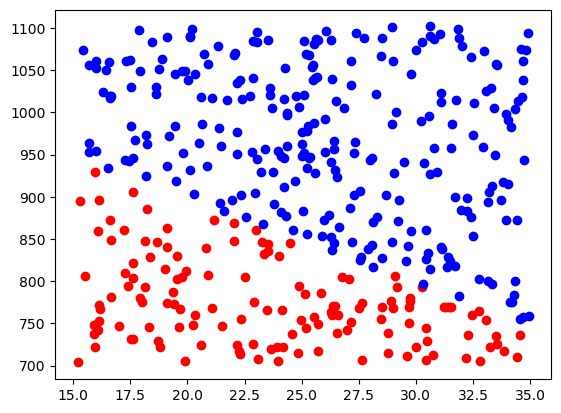

In [26]:
# 🚧 使用plt.scatter()函數畫圖
type_0 = train_data[train_data[:,2]==0]
type_1 = train_data[train_data[:,2]==1]

plt.scatter(type_0[:,0],type_0[:,1],color = 'r')
plt.scatter(type_1[:,0],type_1[:,1],color = 'b')



## 資料正規化
利用線性迴歸中的正規化方法，將訓練資料跟測試資料的"特徵"正規化<br>
以本次使用的資料集來說，特徵即為前兩欄的資料(溫度跟壓力)<br>
切記勿將第三欄的資料正規化，讓其維持0跟1兩種形式即可

**Hint: 資料正規化的步驟為，個別欄的資料先減去該欄的平均值，再除以該欄的標準差。使用np.mean()與np.std()函數可以計算出平均值與標準差**

In [105]:
# 🚧 資料正規化s
train_mean = np.mean(train_data[:,:2],axis = 0)
train_std = np.std(train_data[:,:2],axis = 0)

train_data[:,:2] = (train_data[:,:2]-train_mean)/train_std
test_data[:,:2] = (test_data[:,:2]-train_mean)/train_std

print(train_data[:,1].mean())

1.1102230246251566e-18


## 分離輸入特徵(x)與輸出資料(y)
將訓練資料與測試資料中的x(前兩欄)與y(最後一欄)資料分離
分離後用以下變數儲存：
* 訓練資料(共有N筆)
    * x_train: 訓練資料的輸入特徵，尺寸為[N,2]
    * y_train: 訓練資料的輸出，將最後的尺寸調整為[N, 1]，以利後面的運算
* 測試資料(共有U筆)
    * x_test: 測試資料的輸入特徵，尺寸為[U,2]
    * y_test: 測試資料的輸出，將最後的尺寸調整為[U, 1]，以利後面的運算

In [33]:
# 🚧 分離訓練資料
x_train = train_data[:,:2]
y_train = train_data[:,2].reshape(-1,1)
print(x_train.shape)

# 🚧 分離測試資料
x_test = test_data[:,:2]
y_test = test_data[:,2].reshape(-1,1)

(400, 2)


## 對 x 資料新增常數項
除了資料中包含的原始兩項特徵之外，我們需要額外新增一個數值為1的特徵，使我們的線性方程式包含常數項。若我們總共有N筆資料，具體做法為:<br>
1. 原始 *x* 資料尺寸為 [Nx2]
2. 新增一個尺寸為 [Nx1] 且數值皆為1的向量
3. 使用 ***np.concatenate*** 函數將 *x* 與其拼合成一筆 [Nx3] 的資料

In [55]:
# 🚧 對訓練資料的x新增數值為1的向量
ones = np.ones([x_train.shape[0],1])
x_train = np.concatenate([x_train,ones], axis = 1)

# 🚧 對測試資料的x新增數值為1的向量
ones = np.ones([x_test.shape[0],1])
x_test = np.concatenate([x_test,ones], axis = 1)



## 定義模型 (3分)
線性函數:
$$x^i\in R^{3\times 1}, \theta \in R^{3\times 1}, z^i \in R^{1}$$
$$z^i= \theta^Tx^i$$
線性函數(矩陣形式):
$$X\in R^{N\times 3}, \theta \in R^{3\times 1}, Z \in R^{N \times 1}$$
$$Z = X\theta$$

Sigmoid 函數:
$$\sigma (Z)=\frac{1}{1+e^{-Z}}$$
Logistics model:
$$
h(X)=\sigma (Z)=\sigma(\theta X)=P
$$

In [51]:
def sigmoid(z):
    p = 1/(1+np.exp(-z))
    return p 

def logistic_model(x, theta):
    z= x@theta
    p = sigmoid(z)
    return p

## 定義損失函數與梯度 (4分)
在 Logistics Regression 中:
$$h(x^i)=\sigma (z^i)=\sigma(\theta^Tx^i)=p^i$$
$p^i$ 為該筆資料屬於類別1的機率。<br><br>
損失函數: 
$$L(\theta)=-\frac{1}{N}\sum_{i=1}^{N}y^ilog(p^i)+(1-y^i)log(1-p^i)$$
梯度: 
$$\frac{\partial L(\theta)}{\partial \theta}=\frac{1}{N}\sum_{i=1}^{N}(p^i-y^i)x^i$$

In [73]:
def get_loss(p, y):
    loss = -np.mean(y*np.log(p+1e-6)+(1-y)*np.log(1-p+1e-6))
    return loss

def get_gradient(x, p, y):    
    grad = ((p-y).T@x).T
    return grad

## 初始化 $\theta$
新增一個尺寸為 [3x1] 的向量並儲存在名為 theta 的變量裡。<br>
theta 內的數值可以為隨機變數生成或常數<br>
舉例來說，我可以設定 $\theta = \begin{bmatrix}
0\\ 
0\\ 
0
\end{bmatrix} $ 來初始化 theta

**Hint: 可以使用np.array()來用常數初始化，或是np.random.normal(), np.random.uniform()這兩個函數來隨機初始化**

In [59]:
theta = np.zeros([3,1]) 

# 使用初始化的 theta 進行預測
p = logistic_model(x_train, theta)

# 計算初始的 Loss
print('Initial Loss:', get_loss(p, y_train))

Initial Loss: 0.6931471805599452


## 用迴圈重複執行梯度下降法(10分)
梯度下降法:
$$
\theta^{(k+1)}=\theta^{(k)}-\alpha\frac{\partial L(\theta^{(k)})}{\partial \theta}
$$

In [123]:
# alpha 是學習率，可以調整它來改變學習速度
alpha = 1e-3

for i in range(500):
    p = logistic_model(x_train, theta)
    grad = get_gradient(x_train, p, y_train)
    theta = theta - alpha*grad# 🚧 修改此行使得 theta 藉由梯度下降法改變數值
    print(f'[{i}] Loss:{get_loss(p, y_train)}')

[0] Loss:0.02379567470110128
[1] Loss:0.02379528859443637
[2] Loss:0.02379490251050649
[3] Loss:0.02379451644930935
[4] Loss:0.023794130410842617
[5] Loss:0.023793744395104
[6] Loss:0.0237933584020912
[7] Loss:0.0237929724318019
[8] Loss:0.023792586484233814
[9] Loss:0.02379220055938462
[10] Loss:0.023791814657252015
[11] Loss:0.02379142877783372
[12] Loss:0.02379104292112741
[13] Loss:0.023790657087130795
[14] Loss:0.023790271275841535
[15] Loss:0.023789885487257387
[16] Loss:0.02378949972137602
[17] Loss:0.02378911397819513
[18] Loss:0.02378872825771242
[19] Loss:0.02378834255992559
[20] Loss:0.02378795688483233
[21] Loss:0.023787571232430374
[22] Loss:0.02378718560271738
[23] Loss:0.023786799995691076
[24] Loss:0.023786414411349162
[25] Loss:0.023786028849689327
[26] Loss:0.02378564331070927
[27] Loss:0.023785257794406708
[28] Loss:0.023784872300779348
[29] Loss:0.023784486829824873
[30] Loss:0.023784101381540995
[31] Loss:0.02378371595592542
[32] Loss:0.023783330552975858
[33] Loss

## 定義最終的分類函數
我們的 ***logistic_regression(x, theta)*** 輸出是機率值，代表的是該筆資料為類別1的機率，因此數值為0~1之間。<br>
現在我們定義一個 ***classify(x, theta)*** 函數，將機率值轉換為預測的類別，若機率值大於等於0.5，則類別為1；小於0.5，則類別為0

In [124]:
def classify(x, theta):
    p = logistic_model(x, theta)
    t = p.copy()
    t[p>=0.5]=1
    t[p<0.5]=0
    return t

## 定義準確率函數(accuracy)
準確率的計算方式為: **判斷正確的資料數量/全部的資料數量**<br>
定義一個 ***get_accuracy(y_, y)*** 函數，將***classify***函數計算出來的預測類別 *y_* 與真實的答案 *y* 相比較，得到準確率

In [126]:
def get_accuracy(y_, y):
    right = np.count_nonzero(y_==y)

    accuracy = right/y_.shape[0]
    return accuracy
    

## 計算並列出Loss與準確率 (10分)

In [129]:
# 訓練資料
p_train = logistic_model(x_train, theta)
t_train = classify(x_train, theta)
loss_train = get_loss(p_train, y_train)
accuracy_train = get_accuracy(t_train, y_train)
print('\n<Train>')
print(f'Loss: {loss_train}')
print(f'Accuracy: {accuracy_train}') 

# 測試資料
p_test = logistic_model(x_test, theta)
t_test = classify(x_test, theta)
loss_test = get_loss(p_test, y_test)
accuracy_test = get_accuracy(t_test, y_test)
print('\n<Test>')
print(f'Loss: {loss_test}')
print(f'Accuracy: {accuracy_test}') 


<Train>
Loss: 0.023605410656897106
Accuracy: 0.9975

<Test>
Loss: 0.012530856089605935
Accuracy: 1.0


## 將訓練過程記錄下來並可視化 (20分)
1. 設定三種不同的學習率，alpha = 1, 1e-3, 1e-6 進行三次分別的訓練
2. 對下面的程式進行修改，將每次梯度下降後的 Loss 儲存起來
3. 利用 matplotlib 將 Loss 的變化趨勢畫出來
4. 將 matplotlib 畫出來的 Loss 變化圖儲存下來 (總共要存3張，每張圖上標示該次訓練使用的 alpha 值為多少)

**每次修改完 alpha 值後，theta 就必須要重新初始化。想辦法三次都用同樣的數值初始化，讓每次的訓練起點都相同**

In [142]:
theta = np.zeros([3,1]) # 🚧 初始化 theta

# alpha 1
alpha = 1
losses = []

for i in range(500):
    p = logistic_model(x_train, theta)
    grad = get_gradient(x_train, p, y_train)
    theta = theta - alpha*grad 
    loss = get_loss(p,y_train)
    losses.append(loss)
# 🚧 畫出 Loss 的變化趨勢
plt.title('alpha : 1')
plt.plot(losses)
plt.savefig('loss_alpha_1e.png')
plt.close()

theta = np.zeros([3,1]) # 🚧 初始化 theta

# alpha 1e-3
alpha = 1e-3
losses = []

for i in range(500):
    p = logistic_model(x_train, theta)
    grad = get_gradient(x_train, p, y_train)
    theta = theta - alpha*grad
    loss = get_loss(p,y_train)
    losses.append(loss)
# 🚧 畫出 Loss 的變化趨勢
plt.title('alpha : 1e-3')
plt.plot(losses)
plt.savefig('loss_alpha_1e-3.png')
plt.close()

theta = np.zeros([3,1]) # 🚧 初始化 theta

# alpha 1e-6
alpha = 1e-6
losses = []

for i in range(500):
    p = logistic_model(x_train, theta)
    grad = get_gradient(x_train, p, y_train)
    theta = theta - alpha*grad 
    loss = get_loss(p,y_train)
    losses.append(loss)
# 🚧 畫出 Loss 的變化趨勢
plt.title('alpha : 1e-6')
plt.plot(losses)
plt.savefig('loss_alpha_1e-6.png')
plt.close()
